The LeNet CNN architecture

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

In [10]:
( train_images, train_labels ), ( validation_images, validation_labels ) = mnist.load_data()

print("Training dataset:")
print(train_images.shape)
print(train_labels.shape)
print('Validation dataset:')
print(validation_images.shape)
print(validation_labels.shape)

Training dataset:
(60000, 28, 28)
(60000,)
Validation dataset:
(10000, 28, 28)
(10000,)


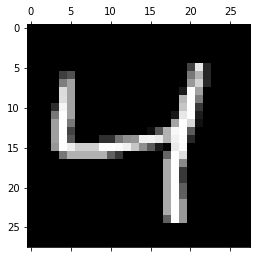

4


In [11]:
plt.matshow( train_images[2], cmap = 'gray')
plt.show()
print(train_labels[2])

In [12]:
train_images = train_images.reshape( ( 60000, 28, 28, 1 ) )
train_images = train_images.astype( 'float32' ) / 255

print("Before:")
print( train_labels.shape )
print( train_labels[0] )

train_labels = to_categorical( train_labels )

print("After:")
print( train_labels.shape )
print( train_labels[0] )

Before:
(60000,)
5
After:
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
model = Sequential()
#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1,  activation = 'sigmoid', input_shape = (28,28,1))) # Should be 32 x 32 x 1 
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'sigmoid', input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'sigmoid'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'sigmoid'))
#Layer 5
#Output Layer
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_8 (Dense)              (None, 84)                10164     
__________

In [18]:
model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 34s 703us/step - loss: 0.4819 - acc: 0.8478 - val_loss: 0.1185 - val_acc: 0.9623
Epoch 2/8
48000/48000 [==============================] - 34s 700us/step - loss: 0.1005 - acc: 0.9685 - val_loss: 0.0794 - val_acc: 0.9763
Epoch 3/8
48000/48000 [==============================] - 33s 692us/step - loss: 0.0733 - acc: 0.9769 - val_loss: 0.0609 - val_acc: 0.9826
Epoch 4/8
48000/48000 [==============================] - 33s 692us/step - loss: 0.0573 - acc: 0.9820 - val_loss: 0.0655 - val_acc: 0.9804
Epoch 5/8
48000/48000 [==============================] - 33s 692us/step - loss: 0.0469 - acc: 0.9851 - val_loss: 0.0681 - val_acc: 0.9791
Epoch 6/8
48000/48000 [==============================] - 33s 696us/step - loss: 0.0395 - acc: 0.9875 - val_loss: 0.0624 - val_acc: 0.9808
Epoch 7/8
48000/48000 [==============================] - 33s 694us/step - loss: 0.0335 - acc: 0.9890 - val_loss: 0.0482 - 